#MNIST
Our objective is to build a neural network for the classification of the MNIST dataset. This neural network will comprise two layers, each with 10 nodes, and an input layer with 784 nodes corresponding to the image pixels. The specific structure of the neural network is outlined below, where $X$ represents the input, $A^{[0]}$ denotes the first layer, $Z^{[1]}$ signifies the unactivated layer 1, $A^{[1]}$ stands for the activated layer 1, and so forth. The weights and biases are represented by $W$ and $b$ respectively:


<div align="center">

$A^{[0]}=X$

$Z^{[1]}=W^{[1]}A^{[0]}+b^{[1]}$

$A^{[1]}=\text{ReLU}(Z^{[1]})$

$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$

$A^{[2]}=\text{softmax}(Z^{[2]})$
</div>




You have the flexibility to create any function within or outside the class, allowing you to modify parameters as needed

In [132]:
#importing libraries
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

### Required functions

In [133]:
# activation and loss functions
def ReLU(Z):
    return np.maximum(0, Z)
    pass

def derivative_ReLU(Z):
    return np.where(Z>0, 1, 0)
    pass

def softmax(Z):
    exp_Z=np.exp(Z-np.max(Z, axis=0, keepdims=True))
    return exp_Z/np.sum(exp_Z, axis=0, keepdims=True)
    pass


In [134]:
#complete the class of neural network

class NN:
  def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
      self.input_size=input_size
      self.hidden_size=hidden_size
      self.output_size=output_size
      self.learning_rate=learning_rate

      #initialize weights and biases
      self.W1=np.random.randn(hidden_size, input_size)*0.01
      self.b1= np.zeros((hidden_size, 1))
      self.W2=np.random.randn(output_size, hidden_size)*0.01
      self.b2=np.zeros((output_size, 1))

      #initialize activations and gradients
      self.AO=None
      self.Z1=None
      self.A1=None
      self.Z2=None
      self.A2=None
      self.dZ2=None
      self.dW2=None
      self.db2=None
      self.dZ1=None
      self.dW1=None
      self.db1=None




      pass

  def forward_propagation(self, X):
      self.A0 = X
      self.Z1 = np.dot(self.W1, self.A0.T) + self.b1
      self.A1 = ReLU(self.Z1)
      self.Z2 = np.dot(self.W2, self.A1) + self.b2
      self.A2 = softmax(self.Z2)


      pass

  def one_hot(self, y): #return a 0 vector with 1 only in the position corresponding to the value in test target
      one_hot_y=np.zeros((self.output_size, y.shape[0]))
      for i in range(y.shape[0]):
        one_hot_y[y[i], i]=1
      return one_hot_y


      pass

  def backward_propagation(self, X, y):
      m = y.shape[0]

      # Assuming self.A2, self.A1, self.Z1, and self.AO are computed in forward propagation
      # You need to define these values based on your forward propagation implementation

      # Calculate the derivative of the cost with respect to Z2
      self.dZ2 = self.A2 - self.one_hot(y)

      # Calculate gradients for the second layer (output layer)
      self.dW2 = (1/m) * np.dot(self.dZ2, self.A1.T)
      self.db2 = (1/m) * np.sum(self.dZ2, axis=1, keepdims=True)

      # Calculate the derivative of the cost with respect to Z1
      self.dZ1 = np.dot(self.W2.T, self.dZ2) * derivative_ReLU(self.Z1)

      # Calculate gradients for the first layer
      self.dW1 = (1/m) * np.dot(self.dZ1, self.A0)
      self.db1 = (1/m) * np.sum(self.dZ1, axis=1, keepdims=True)

      pass

  def update_params(self):
      self.W1=self.W1-self.learning_rate*self.dW1
      self.b1=self.b1-self.learning_rate*self.db1
      self.W2=self.W2-self.learning_rate*self.dW2
      self.b2=self.b2-self.learning_rate*self.db2

      pass

  def get_predictions(self):
      return np.argmax(self.A2, axis=0)
      pass

  def get_accuracy(self, X, y):
      self.forward_propagation(X)
      predictions=self.get_predictions()
      if predictions.shape != y.shape:
        raise ValueError("Shapes of predictions and y must be the same for accuracy calculation.")
      accuracy=np.mean(predictions==y)*100

      return accuracy

      pass

  def gradient_descent(self, X, y, iters=1000):
    for i in range(iters):
      self.forward_propagation(X)
      self.backward_propagation(X,y)
      self.update_params()

      pass
  def cross_entropy_loss(self, X, y):
    self.forward_propagation(X)
    m = y.shape[0]
    log_probs = np.log(self.A2 + 1e-15)
    loss = -np.sum(np.multiply(y, log_probs)) / m

    return loss


  def show_predictions(self, X, y, num_samples=10):
        # Get random indices for the samples
    random_indices = np.random.randint(0, X.shape[0], size=num_samples)

    for index in random_indices:
      sample_image = X[index, :].reshape((28, 28))
      plt.imshow(sample_image, cmap='gray')
      plt.title(f"Actual: {y[index]}, Predicted: {self.get_predictions()[index]}")
      plt.show()


## main

In [135]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

###preprocessing the data


In [136]:

miu = np.mean(X_train, axis=(0, 1), keepdims=True)
stds = np.std(X_train, axis=(0, 1), keepdims=True)

mius = np.mean(X_test, axis=(0, 1), keepdims=True)
stdse = np.std(X_test, axis=(0, 1), keepdims=True)

X_normal_train = (X_train - miu) / (stds + 1e-7)
X_normal_test = (X_test - mius) / (stdse + 1e-7)

X_normal_train = X_normal_train.reshape((60000, -1))
X_normal_test = X_normal_test.reshape((10000, -1))



###Model Training

In [137]:
#training model using gradient descent
input_size=X_normal_train.shape[1]
hidden_size=128
output_size=10
learning_rate=0.01
model=NN(input_size, hidden_size, output_size, learning_rate)
model.gradient_descent(X_normal_train, Y_train, iters=1000)


### Viewing Results


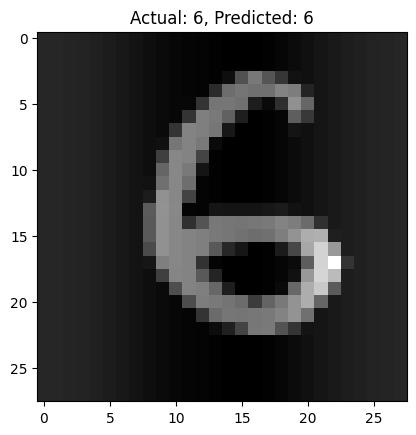

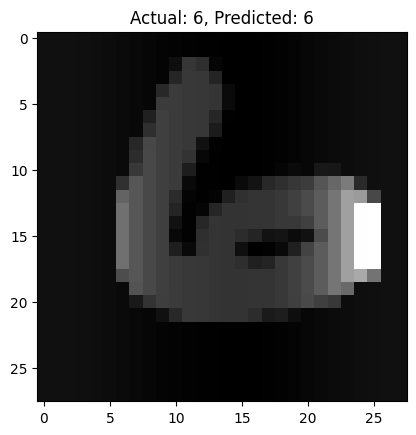

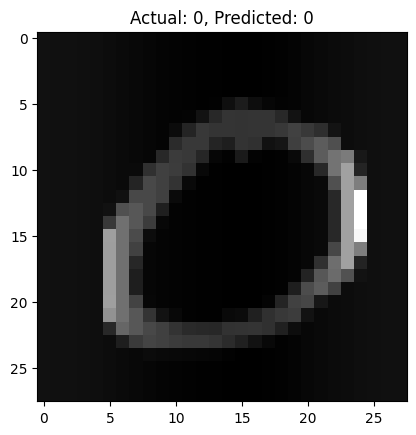

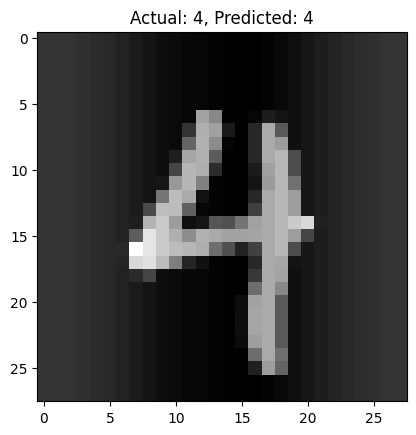

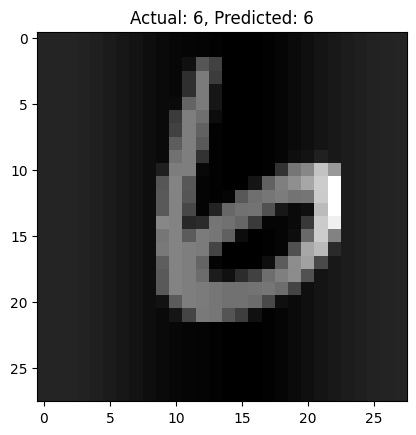

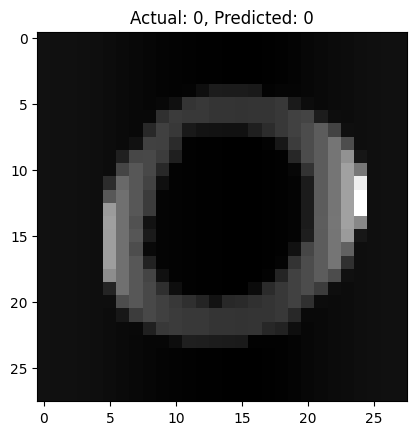

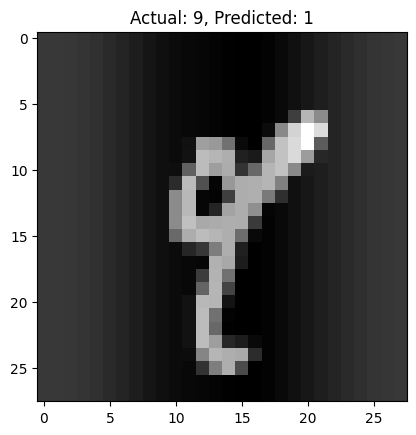

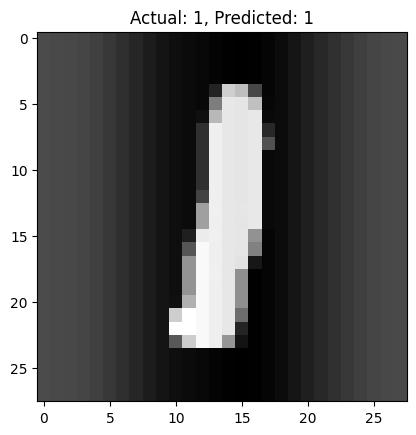

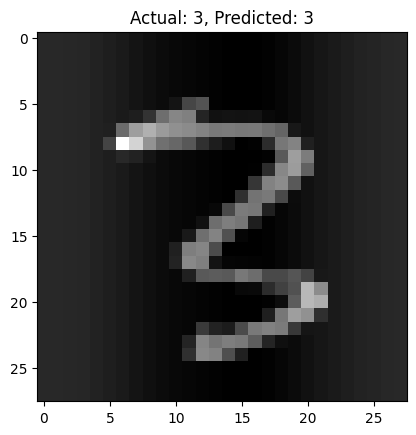

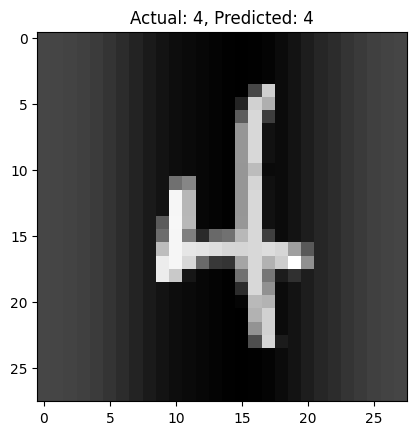

90.12
265.56373568743305


In [139]:
#viewing prediction for 10 random images in dataset
model.show_predictions(X_normal_test, Y_test, 10)
print(model.get_accuracy(X_normal_test,Y_test))
print(model.cross_entropy_loss(X_normal_test, Y_test))